In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('output.csv', sep=';')

df['Tempo'] = df['Tempo']*1000

df['Entrada'] = df['Entrada'].astype(str)

# Display the first few rows of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Método    4800 non-null   object 
 1   Entrada   4800 non-null   object 
 2   Tempo     4800 non-null   float64
 3   Execução  4800 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 150.1+ KB


In [15]:


def determinar_tipo(x):
    if x.startswith('a'):
        return 'Aleatorio'
    elif x.startswith('d'):
        return 'Decrescente'
    elif x.startswith('o'):
        return 'Ordenado'
    elif x.startswith('p'):
        return 'Preordenado'
    else:
        return 'Outro'

df['TipoOrdenacao'] = df['Entrada'].apply(determinar_tipo)


def remove(x):
    if x.startswith('a'):
        return x[1:]
    elif x.startswith('d'):
        return x[1:]
    elif x.startswith('o'):
        return x[1:]
    elif x.startswith('po'):
        return x[2:]
    else:
        return 'Outro'

df['N'] = df['Entrada'].apply(remove).astype(int)
df.info()


print(df['TipoOrdenacao'].value_counts())

#df.to_csv('processed_output.csv', sep=';', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Método         4800 non-null   object 
 1   Entrada        4800 non-null   object 
 2   Tempo          4800 non-null   float64
 3   Execução       4800 non-null   int64  
 4   TipoOrdenacao  4800 non-null   object 
 5   N              4800 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 206.4+ KB
TipoOrdenacao
Aleatorio      1200
Decrescente    1200
Ordenado       1200
Preordenado    1200
Name: count, dtype: int64


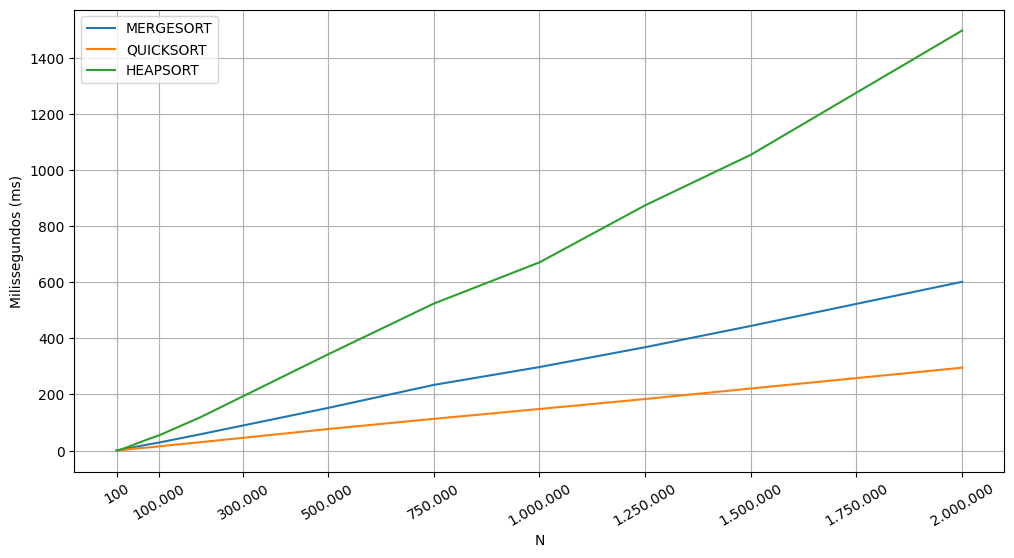

In [ ]:
dfAleatorio = df.loc[df['TipoOrdenacao'] == 'Aleatorio']

#dfAleatorio.to_csv('dfAleatorio.csv', sep=';', index=False)

dfMergeAleatorio = dfAleatorio[dfAleatorio['Método'] == 'MERGESORT']
dfQuickAleatorio = dfAleatorio[dfAleatorio['Método'] == 'QUICKSORT']
dfHeapAleatorio = dfAleatorio[dfAleatorio['Método'] == 'HEAPSORT']

dfMergeAleatorio_grouped = dfMergeAleatorio.groupby('N')['Tempo'].mean()
dfQuickAleatorio_grouped = dfQuickAleatorio.groupby('N')['Tempo'].mean()
dfHeapAleatorio_grouped = dfHeapAleatorio.groupby('N')['Tempo'].mean()



xticks_values = [100, 100000,300000, 500000,750000, 1000000,1250000,1500000,1750000, 2000000]
xticks_labels = ['100','100.000','300.000', '500.000','750.000','1.000.000', '1.250.000','1.500.000','1.750.000', '2.000.000']

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dfMergeAleatorio_grouped.index, dfMergeAleatorio_grouped.values, label='MERGESORT')
plt.plot(dfQuickAleatorio_grouped.index, dfQuickAleatorio_grouped.values, label='QUICKSORT')
plt.plot(dfHeapAleatorio_grouped.index, dfHeapAleatorio_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Aleatório)')
plt.legend()
plt.grid(True)

plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'Aleatorio' + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')

plt.show()



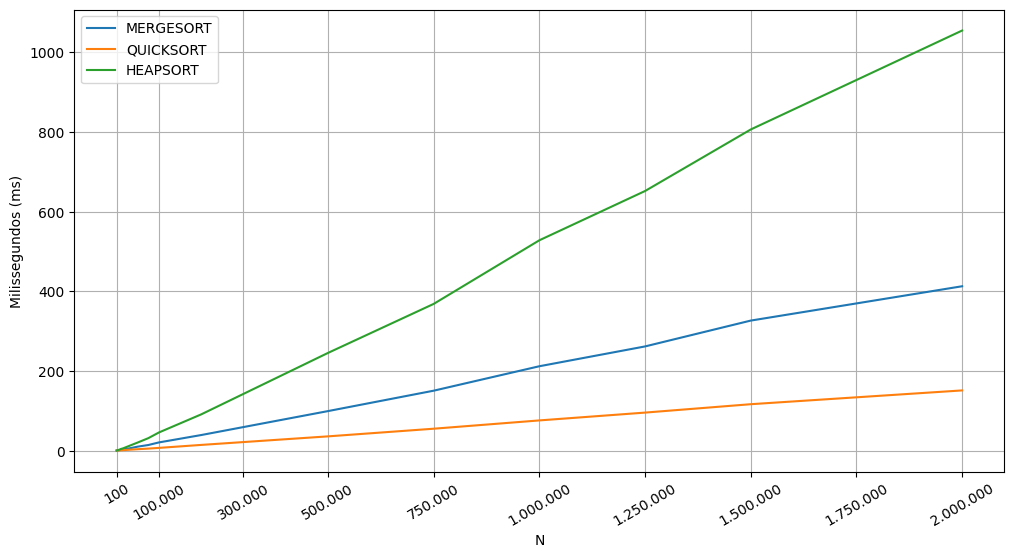

In [ ]:
dfDecrescente = df.loc[df['TipoOrdenacao'] == 'Decrescente']

#dfDecrescente.to_csv('dfDecrescente.csv', sep=';', index=False)

dfMergeDecrescente = dfDecrescente[dfDecrescente['Método'] == 'MERGESORT']
dfQuickDecrescente = dfDecrescente[dfDecrescente['Método'] == 'QUICKSORT']
dfHeapDecrescente = dfDecrescente[dfDecrescente['Método'] == 'HEAPSORT']

dfMergeDecrescente_grouped = dfMergeDecrescente.groupby('N')['Tempo'].mean()
dfQuickDecrescente_grouped = dfQuickDecrescente.groupby('N')['Tempo'].mean()
dfHeapDecrescente_grouped = dfHeapDecrescente.groupby('N')['Tempo'].mean()


# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dfMergeDecrescente_grouped.index, dfMergeDecrescente_grouped.values, label='MERGESORT')
plt.plot(dfQuickDecrescente_grouped.index, dfQuickDecrescente_grouped.values, label='QUICKSORT')
plt.plot(dfHeapDecrescente_grouped.index, dfHeapDecrescente_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Decrescente)')
plt.legend()
plt.grid(True)




plt.xticks(xticks_values, xticks_labels, rotation=30)


dire = 'imagens/' + 'Decrescente' + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')

plt.show()


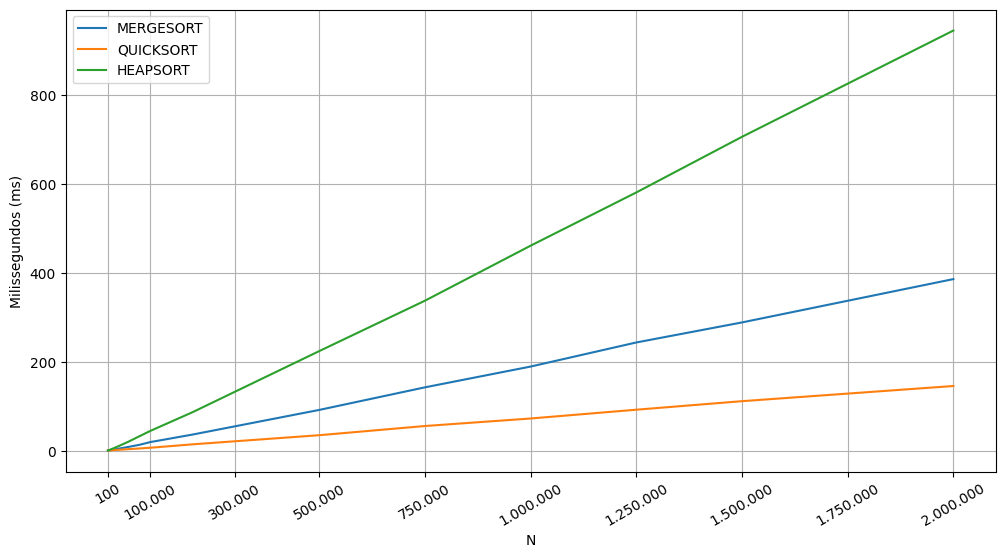

In [ ]:
dfPreOrdenado = df.loc[df['TipoOrdenacao'] == 'Preordenado']

#dfPreOrdenado.to_csv('dfPreOrdenado.csv', sep=';', index=False)

dfMergePreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'MERGESORT']
dfQuickPreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'QUICKSORT']
dfHeapPreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'HEAPSORT']

dfMergePreOrdenado_grouped = dfMergePreOrdenado.groupby('N')['Tempo'].mean()
dfQuickPreOrdenado_grouped = dfQuickPreOrdenado.groupby('N')['Tempo'].mean()
dfHeapPreOrdenado_grouped = dfHeapPreOrdenado.groupby('N')['Tempo'].mean()


# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dfMergePreOrdenado_grouped.index, dfMergePreOrdenado_grouped.values, label='MERGESORT')
plt.plot(dfQuickPreOrdenado_grouped.index, dfQuickPreOrdenado_grouped.values, label='QUICKSORT')
plt.plot(dfHeapPreOrdenado_grouped.index, dfHeapPreOrdenado_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Parcialmente Ordenado)')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'ParicalmenteOrdenado' + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')

plt.show()


N
100          0.023612
200          0.034444
500          0.074931
1000         0.164512
2000         0.275082
5000         0.841612
7500         1.088018
10000        1.466190
15000        2.198854
30000        5.066334
50000        8.440637
75000       12.980560
100000      18.496185
200000      35.945400
500000      90.841955
750000     144.587450
1000000    193.381450
1250000    257.399150
1500000    287.642700
2000000    383.893500
Name: Tempo, dtype: float64

N
100          0.024618
200          0.053567
500          0.146073
1000         0.290865
2000         0.621121
5000         1.742339
7500         2.936005
10000        3.867407
15000        5.595349
30000       11.697665
50000       20.555170
75000       32.297100
100000      43.866450
200000      85.700815
500000     220.125800
750000     343.113800
1000000    466.963550
1250000    583.801600
1500000    697.411300
2000000    943.105800
Name: Tempo, dtype: float64

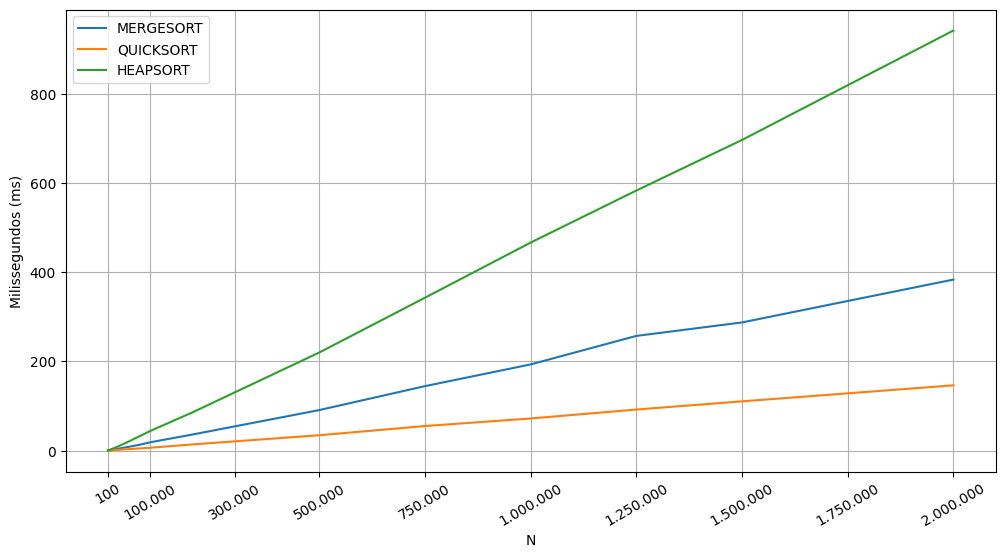

In [ ]:
dfOrdenado = df.loc[df['TipoOrdenacao'] == 'Ordenado']

#dfOrdenado.to_csv('dfOrdenado.csv', sep=';', index=False)

dfMergeOrdenado = dfOrdenado[dfOrdenado['Método'] == 'MERGESORT']
dfQuickOrdenado = dfOrdenado[dfOrdenado['Método'] == 'QUICKSORT']
dfHeapOrdenado = dfOrdenado[dfOrdenado['Método'] == 'HEAPSORT']

dfMergeOrdenado_grouped = dfMergeOrdenado.groupby('N')['Tempo'].mean()



dfQuickOrdenado_grouped = dfQuickOrdenado.groupby('N')['Tempo'].mean()
dfHeapOrdenado_grouped = dfHeapOrdenado.groupby('N')['Tempo'].mean()

display(dfMergeOrdenado_grouped)
display(dfHeapOrdenado_grouped)



# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dfMergeOrdenado_grouped.index, dfMergeOrdenado_grouped.values, label='MERGESORT')
plt.plot(dfQuickOrdenado_grouped.index, dfQuickOrdenado_grouped.values, label='QUICKSORT')
plt.plot(dfHeapOrdenado_grouped.index, dfHeapOrdenado_grouped.values, label='HEAPSORT')
plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Ordenado)')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'Ordenado'  + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')


plt.show()


## POR CONJUNTO 

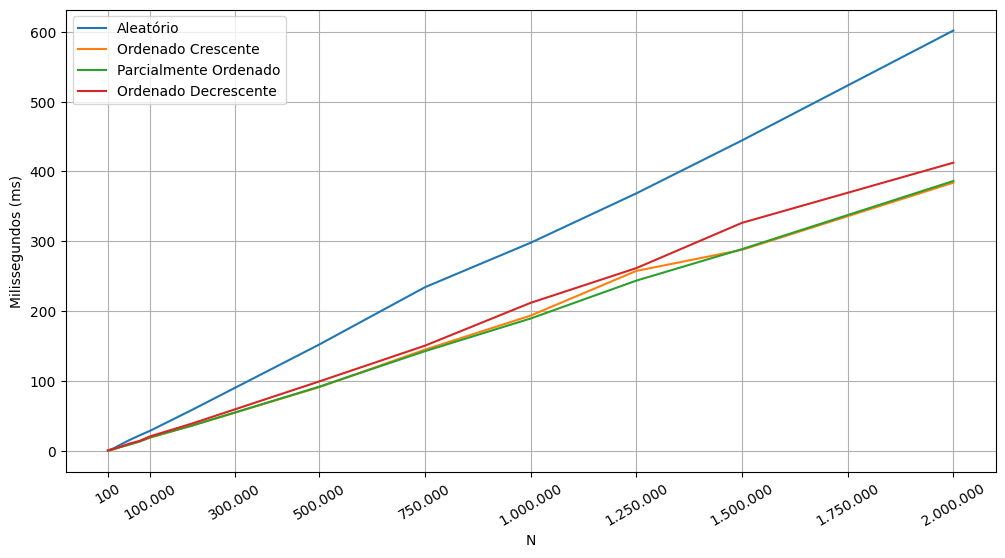

In [ ]:
df_combined = pd.DataFrame({
  'N': dfMergeAleatorio_grouped.index,
  'Tempo_Aleatorio': dfMergeAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfMergeOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfMergePreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfMergeDecrescente_grouped.values
})



plt.figure(figsize=(12, 6))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'MergeConjuntos'  + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')
plt.show()

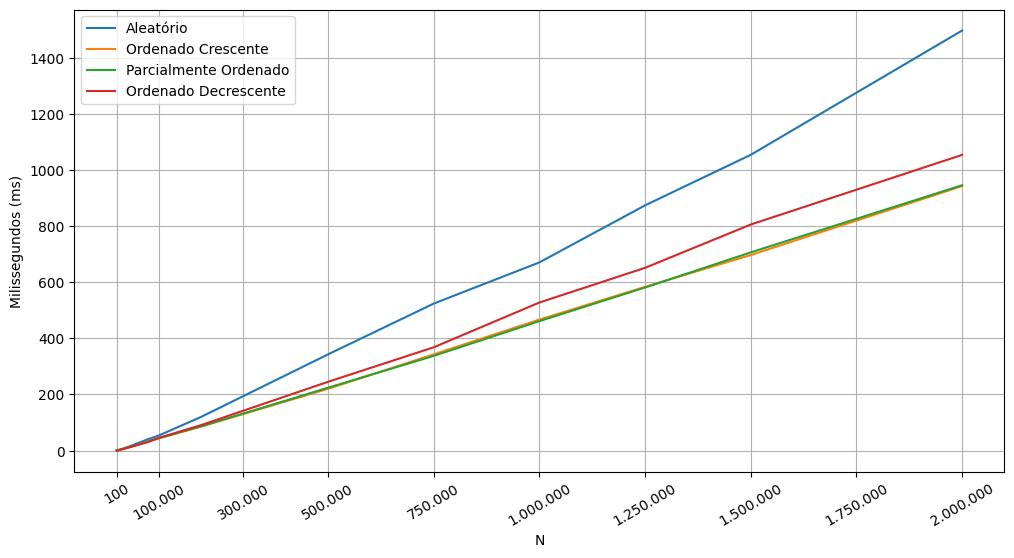

In [ ]:
df_combined = pd.DataFrame({
  'N': dfHeapAleatorio_grouped.index,
  'Tempo_Aleatorio': dfHeapAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfHeapOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfHeapPreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfHeapDecrescente_grouped.values
})



plt.figure(figsize=(12, 6))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'heapConjuntos'  + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')

plt.show()

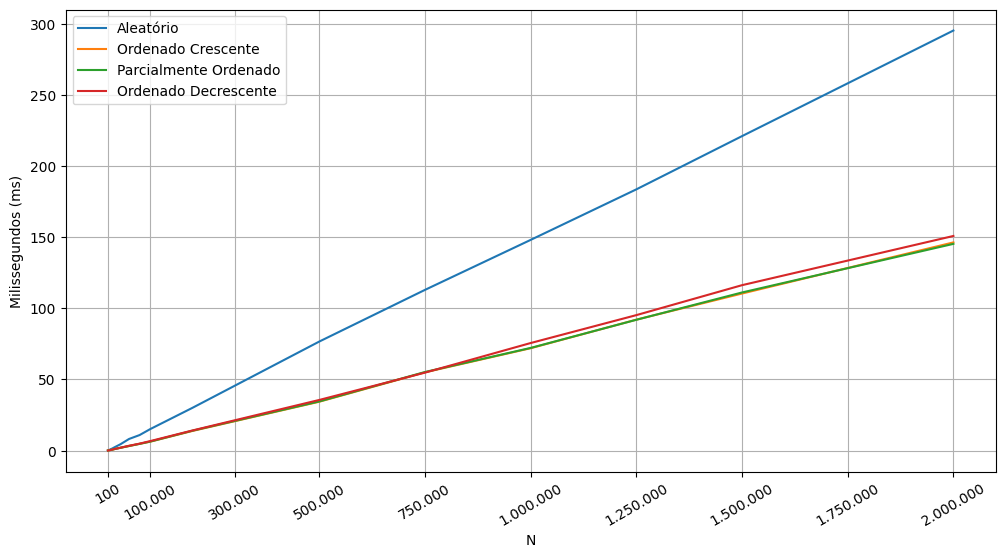

In [ ]:
df_combined = pd.DataFrame({
  'N': dfQuickAleatorio_grouped.index,
  'Tempo_Aleatorio': dfQuickAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfQuickOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfQuickPreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfQuickDecrescente_grouped.values
})



plt.figure(figsize=(12, 6))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels, rotation=30)

dire = 'imagens/' + 'QuickConjuntos'  + '.pdf'
plt.savefig(dire, dpi = 400, bbox_inches='tight')

plt.show()

In [23]:
# Create a new example dataframe
resultadoGeral = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  
  'Merge_Aleatorio': dfMergeAleatorio_grouped.values,
  'Merge_OrdenadoCrescente': dfMergeOrdenado_grouped.values,
  'Merge_ParcialmenteOrdenado': dfMergePreOrdenado_grouped.values,
  'Merge_OrdenadoDecrescente': dfMergeDecrescente_grouped.values,

  'Quick_Aleatorio': dfQuickAleatorio_grouped.values,
  'Quick_OrdenadoCrescente': dfQuickOrdenado_grouped.values,
  'Quick_ParcialmenteOrdenado': dfQuickPreOrdenado_grouped.values,
  'Quick_OrdenadoDecrescente': dfQuickDecrescente_grouped.values,

  'Heap_Aleatorio': dfHeapAleatorio_grouped.values,
  'Heap_OrdenadoCrescente': dfHeapOrdenado_grouped.values,
  'Heap_ParcialmenteOrdenado': dfHeapPreOrdenado_grouped.values,
  'Heap_OrdenadoDecrescente': dfHeapDecrescente_grouped.values


}).round(3)

dire = 'tabelas/' + 'ResultadoGeral' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
resultadoGeral.to_csv(direCsv, index=False)
# Exporting the dataframe to LaTeX format
resultadoGeral.to_latex(direLatex,index=False, float_format="%.3f")

display(resultadoGeral)





,Name,Merge_Aleatorio,Merge_OrdenadoCrescente,Merge_ParcialmenteOrdenado,Merge_OrdenadoDecrescente,Quick_Aleatorio,Quick_OrdenadoCrescente,Quick_ParcialmenteOrdenado,Quick_OrdenadoDecrescente,Heap_Aleatorio,Heap_OrdenadoCrescente,Heap_ParcialmenteOrdenado,Heap_OrdenadoDecrescente
0,100,0.023,0.024,0.022,0.020,0.012,0.004,0.008,0.005,0.025,0.025,0.025,0.022
1,200,0.046,0.034,0.044,0.038,0.023,0.008,0.013,0.009,0.054,0.054,0.058,0.051
2,500,0.119,0.075,0.088,0.084,0.064,0.022,0.029,0.021,0.157,0.146,0.145,0.133
3,1000,0.224,0.165,0.168,0.171,0.128,0.048,0.055,0.049,0.327,0.291,0.307,0.289
4,2000,0.446,0.275,0.287,0.298,0.273,0.102,0.107,0.105,0.688,0.621,0.630,0.581
5,5000,1.242,0.842,0.834,0.890,0.677,0.294,0.292,0.306,1.990,1.742,1.704,1.653
6,7500,1.910,1.088,1.077,1.220,1.084,0.436,0.450,0.454,3.128,2.936,2.888,2.695
7,10000,2.347,1.466,1.565,1.729,1.365,0.606,0.622,0.633,4.096,3.867,3.889,3.923
8,15000,3.612,2.199,2.247,2.801,2.188,0.988,0.988,1.022,6.450,5.595,5.662,5.424
9,30000,8.460,5.066,5.058,5.424,4.471,1.964,1.950,2.000,14.732,11.698,11.941,11.764


In [24]:
# Create a new example dataframe
aleatorio = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'MergeAleatorio': dfMergeAleatorio_grouped.values,
  'QuickAleatorio': dfQuickAleatorio_grouped.values,
  'HeapAleatorio': dfHeapAleatorio_grouped.values,
}).round(3)
dire = 'tabelas/' + 'aleatorio'
dire = 'tabelas/' + 'aleatorio' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
aleatorio.to_csv(direCsv, index=False)
# Exporting the dataframe to LaTeX format
aleatorio.to_latex(direLatex,index=False, float_format="%.3f")
display(aleatorio)

ordenado = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'MergeOrdenadoDecrescente': dfMergeDecrescente_grouped.values,
  'QuickOrdenadoCrescente': dfQuickOrdenado_grouped.values,
  'HeapOrdenadoCrescente': dfHeapOrdenado_grouped.values,
}).round(3)
dire = 'tabelas/' + 'ordenado'
dire = 'tabelas/' + 'ordenado' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
ordenado.to_csv(direCsv, index=False)
ordenado.to_latex(direLatex,index=False, float_format="%.3f")
display(ordenado)

parcialordenado = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'MergeParcialmenteOrdenado': dfMergePreOrdenado_grouped.values,
  'QuickParcialmenteOrdenado': dfQuickPreOrdenado_grouped.values,
  'HeapParcialmenteOrdenado': dfHeapPreOrdenado_grouped.values,
}).round(3)
dire = 'tabelas/' + 'parcialordenado'
dire = 'tabelas/' + 'parcialordenado' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
parcialordenado.to_csv(direCsv, index=False)
parcialordenado.to_latex(direLatex,index=False, float_format="%.3f")
display(parcialordenado)

ordenadoDecrescente = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'MergeOrdenadoDecrescente': dfMergeDecrescente_grouped.values,
  'QuickOrdenadoDecrescente': dfQuickDecrescente_grouped.values,
  'HeapOrdenadoDecrescente': dfHeapDecrescente_grouped.values
}).round(3)
dire = 'tabelas/' + 'ordenadoDecrescente' 
dire = 'tabelas/' + 'ordenadoDecrescente' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
ordenadoDecrescente.to_csv(direCsv, index=False)
ordenadoDecrescente.to_latex(direLatex,index=False, float_format="%.3f")
display(ordenadoDecrescente)



,Name,MergeAleatorio,QuickAleatorio,HeapAleatorio
0,100,0.023,0.012,0.025
1,200,0.046,0.023,0.054
2,500,0.119,0.064,0.157
3,1000,0.224,0.128,0.327
4,2000,0.446,0.273,0.688
5,5000,1.242,0.677,1.990
6,7500,1.910,1.084,3.128
7,10000,2.347,1.365,4.096
8,15000,3.612,2.188,6.450
9,30000,8.460,4.471,14.732


,Name,MergeOrdenadoDecrescente,QuickOrdenadoCrescente,HeapOrdenadoCrescente
0,100,0.020,0.004,0.025
1,200,0.038,0.008,0.054
2,500,0.084,0.022,0.146
3,1000,0.171,0.048,0.291
4,2000,0.298,0.102,0.621
5,5000,0.890,0.294,1.742
6,7500,1.220,0.436,2.936
7,10000,1.729,0.606,3.867
8,15000,2.801,0.988,5.595
9,30000,5.424,1.964,11.698


,Name,MergeParcialmenteOrdenado,QuickParcialmenteOrdenado,HeapParcialmenteOrdenado
0,100,0.022,0.008,0.025
1,200,0.044,0.013,0.058
2,500,0.088,0.029,0.145
3,1000,0.168,0.055,0.307
4,2000,0.287,0.107,0.630
5,5000,0.834,0.292,1.704
6,7500,1.077,0.450,2.888
7,10000,1.565,0.622,3.889
8,15000,2.247,0.988,5.662
9,30000,5.058,1.950,11.941


,Name,MergeOrdenadoDecrescente,QuickOrdenadoDecrescente,HeapOrdenadoDecrescente
0,100,0.020,0.005,0.022
1,200,0.038,0.009,0.051
2,500,0.084,0.021,0.133
3,1000,0.171,0.049,0.289
4,2000,0.298,0.105,0.581
5,5000,0.890,0.306,1.653
6,7500,1.220,0.454,2.695
7,10000,1.729,0.633,3.923
8,15000,2.801,1.022,5.424
9,30000,5.424,2.000,11.764


In [25]:
quick = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'QuickAleatorio': dfQuickAleatorio_grouped.values,
  'QuickOrdenadoCrescente': dfQuickOrdenado_grouped.values,
  'QuickParcialmenteOrdenado': dfQuickPreOrdenado_grouped.values,
  'QuickOrdenadoDecrescente': dfQuickDecrescente_grouped.values,
}).round(3)
dire = 'tabelas/' + 'quick' 
dire = 'tabelas/' + 'quick' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
quick.to_csv(direCsv, index=False)
quick.to_latex(direLatex,index=False, float_format="%.3f")
display(quick)

merge = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'MergeAleatorio': dfMergeAleatorio_grouped.values,
  'MergeOrdenadoCrescente': dfMergeOrdenado_grouped.values,
  'MergeParcialmenteOrdenado': dfMergePreOrdenado_grouped.values,
  'MergeOrdenadoDecrescente': dfMergeDecrescente_grouped.values,

}).round(3)
dire = 'tabelas/' + 'merge' 
dire = 'tabelas/' + 'merge' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
merge.to_csv(direCsv, index=False)
merge.to_latex(direLatex,index=False, float_format="%.3f")
display(merge)

heap = pd.DataFrame({
  'Name': dfQuickAleatorio_grouped.index,
  'HeapAleatorio': dfHeapAleatorio_grouped.values,
  'HeapOrdenadoCrescente': dfHeapOrdenado_grouped.values,
  'HeapParcialmenteOrdenado': dfHeapPreOrdenado_grouped.values,
  'HeapOrdenadoDecrescente': dfHeapDecrescente_grouped.values
}).round(3)
dire = 'tabelas/' + 'heap' 
dire = 'tabelas/' + 'heap' 
direCsv = dire + '.csv'
direLatex = dire + '.tex'
heap.to_csv(direCsv, index=False)
heap.to_latex(direLatex,index=False, float_format="%.3f")
display(heap)

,Name,QuickAleatorio,QuickOrdenadoCrescente,QuickParcialmenteOrdenado,QuickOrdenadoDecrescente
0,100,0.012,0.004,0.008,0.005
1,200,0.023,0.008,0.013,0.009
2,500,0.064,0.022,0.029,0.021
3,1000,0.128,0.048,0.055,0.049
4,2000,0.273,0.102,0.107,0.105
5,5000,0.677,0.294,0.292,0.306
6,7500,1.084,0.436,0.450,0.454
7,10000,1.365,0.606,0.622,0.633
8,15000,2.188,0.988,0.988,1.022
9,30000,4.471,1.964,1.950,2.000


,Name,MergeAleatorio,MergeOrdenadoCrescente,MergeParcialmenteOrdenado,MergeOrdenadoDecrescente
0,100,0.023,0.024,0.022,0.020
1,200,0.046,0.034,0.044,0.038
2,500,0.119,0.075,0.088,0.084
3,1000,0.224,0.165,0.168,0.171
4,2000,0.446,0.275,0.287,0.298
5,5000,1.242,0.842,0.834,0.890
6,7500,1.910,1.088,1.077,1.220
7,10000,2.347,1.466,1.565,1.729
8,15000,3.612,2.199,2.247,2.801
9,30000,8.460,5.066,5.058,5.424


,Name,HeapAleatorio,HeapOrdenadoCrescente,HeapParcialmenteOrdenado,HeapOrdenadoDecrescente
0,100,0.025,0.025,0.025,0.022
1,200,0.054,0.054,0.058,0.051
2,500,0.157,0.146,0.145,0.133
3,1000,0.327,0.291,0.307,0.289
4,2000,0.688,0.621,0.630,0.581
5,5000,1.990,1.742,1.704,1.653
6,7500,3.128,2.936,2.888,2.695
7,10000,4.096,3.867,3.889,3.923
8,15000,6.450,5.595,5.662,5.424
9,30000,14.732,11.698,11.941,11.764
